___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Natural Language Processing Project


## Imports
 **Import the usual suspects. :) **

In [22]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
import string

%matplotlib inline

## The Data

**Read the yelp.csv file and set it as a dataframe called yelp.**

In [15]:
yelp_data = pd.read_csv('yelp.csv')

** Check the head, info , and describe methods on yelp.**

In [16]:
yelp_data.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [17]:
yelp_data.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [18]:
yelp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.3+ KB


**Create a new column called "text length" which is the number of words in the text column.**

In [19]:
yelp_data['text length'] = yelp_data['text'].apply(len)

# EDA

Let's explore the data


**Use FacetGrid from the seaborn library to create a grid of 5 histograms of text length based off of the star ratings. Reference the seaborn documentation for hints on this**

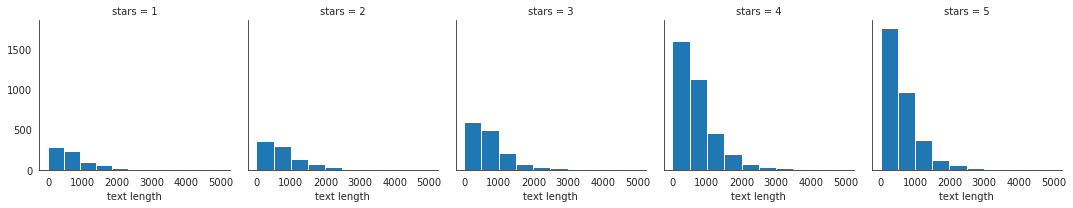

In [23]:
sns.set_style('white')

g = sns.FacetGrid(yelp_data,col='stars')
g.map(plt.hist,'text length')

**Create a boxplot of text length for each star category.**

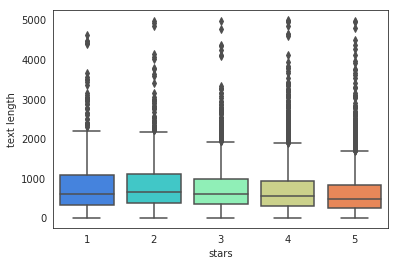

In [24]:
sns.boxplot(x='stars',y='text length',data=yelp_data,palette='rainbow')

**Create a countplot of the number of occurrences for each type of star rating.**

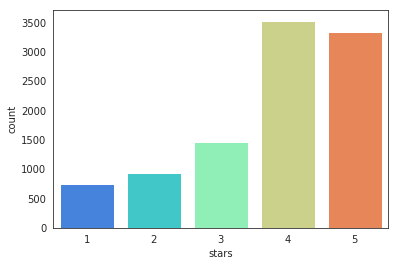

In [25]:
sns.countplot(x='stars',data=yelp_data,palette='rainbow')

** Use groupby to get the mean values of the numerical columns, you should be able to create this dataframe with the operation:**

In [27]:
stars = yelp_data.groupby('stars').mean()
stars

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


**Use the corr() method on that groupby dataframe to produce this dataframe:**

In [28]:
stars.corr()

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text length,-0.857664,0.699881,0.843461,1.000000


**Then use seaborn to create a heatmap based off that .corr() dataframe:**

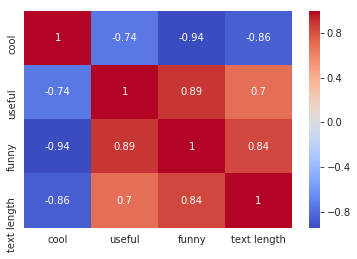

In [29]:
sns.heatmap(stars.corr(),cmap='coolwarm',annot=True)

## NLP Classification Task

Let's move on to the actual task. To make things a little easier, go ahead and only grab reviews that were either 1 star or 5 stars.

**Create a dataframe called yelp_class that contains the columns of yelp dataframe but for only the 1 or 5 star reviews.**

In [32]:
#yelp_data['stars'].head()

0    5
1    5
2    4
3    5
4    5
Name: stars, dtype: int64

In [58]:
label = []
star =  yelp_data['stars'].tolist()

for i in range(0,len(star)):
    if star[i]==1 or star[i]==2:
        label.append(-1)
    elif star[i]==3:
        label.append(0)
    else:
        label.append(1)

#print(label)

yelp_data['labels']=label

print(yelp_data.tail())

                 business_id        date               review_id  stars  \
9995  VY_tvNUCCXGXQeSvJl757Q  2012-07-28  Ubyfp2RSDYW0g7Mbr8N3iA      3   
9996  EKzMHI1tip8rC1-ZAy64yg  2012-01-18  2XyIOQKbVFb6uXQdJ0RzlQ      4   
9997  53YGfwmbW73JhFiemNeyzQ  2010-11-16  jyznYkIbpqVmlsZxSDSypA      4   
9998  9SKdOoDHcFoxK5ZtsgHJoA  2012-12-02  5UKq9WQE1qQbJ0DJbc-B6Q      2   
9999  pF7uRzygyZsltbmVpjIyvw  2010-10-16  vWSmOhg2ID1MNZHaWapGbA      5   

                                                   text    type  \
9995  First visit...Had lunch here today - used my G...  review   
9996  Should be called house of deliciousness!\n\nI ...  review   
9997  I recently visited Olive and Ivy for business ...  review   
9998  My nephew just moved to Scottsdale recently so...  review   
9999  4-5 locations.. all 4.5 star average.. I think...  review   

                     user_id  cool  useful  funny  text length  labels  
9995  _eqQoPtQ3e3UxLE4faT6ow     1       2      0          668       0  


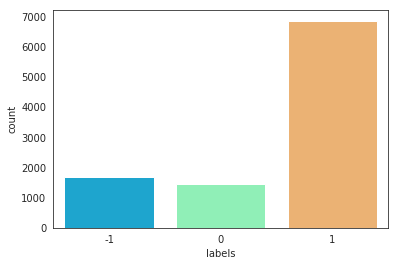

In [83]:
sns.countplot(x='labels',data=yelp_data,palette='rainbow')

** Create two objects X and y. X will be the 'text' column of yelp_class and y will be the 'stars' column of yelp_class. (Your features and target/labels)**

In [60]:
X = yelp_data['text']
y = yelp_data['labels']

**Import CountVectorizer and create a CountVectorizer object.**

In [61]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

** Use the fit_transform method on the CountVectorizer object and pass in X (the 'text' column). Save this result by overwriting X.**

In [93]:
X = cv.fit_transform(X)
#print(X)

  (0, 2308)	1
  (0, 11329)	1
  (0, 26360)	1
  (0, 28051)	1
  (0, 4283)	1
  (0, 1592)	1
  (0, 26363)	1
  (0, 5833)	1
  (0, 16153)	1
  (0, 669)	1
  (0, 3627)	1
  (0, 11634)	1
  (0, 17861)	1
  (0, 19278)	1
  (0, 28636)	2
  (0, 4259)	1
  (0, 7326)	1
  (0, 25720)	1
  (0, 23529)	1
  (0, 27699)	1
  (0, 8711)	1
  (0, 22632)	1
  (0, 26843)	1
  (0, 28448)	1
  (0, 15359)	1
  :	:
  (9999, 26891)	1
  (9999, 29023)	1
  (9999, 13770)	3
  (9999, 1231)	1
  (9999, 11587)	1
  (9999, 22398)	1
  (9999, 19412)	2
  (9999, 28246)	1
  (9999, 2017)	1
  (9999, 26025)	1
  (9999, 1773)	1
  (9999, 23993)	1
  (9999, 28051)	1
  (9999, 17861)	2
  (9999, 28636)	1
  (9999, 28400)	2
  (9999, 10624)	1
  (9999, 13387)	1
  (9999, 29008)	1
  (9999, 22830)	1
  (9999, 26049)	1
  (9999, 26035)	5
  (9999, 1453)	1
  (9999, 17983)	2
  (9999, 17130)	2


## Train Test Split

Let's split our data into training and testing data.

** Use train_test_split to split up the data into X_train, X_test, y_train, y_test. Use test_size=0.3 and random_state=101 **

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [94]:
#X_train
y_train

803     1
1387    1
921     1
5917    1
9610   -1
6225    0
6167    1
3628   -1
1199    1
6506    0
8450    1
3674    1
2277    1
259     1
6813    1
1451    0
1613    1
2990   -1
8065   -1
1389    0
668     1
4853    1
5591    1
2209    1
7023    1
4283   -1
1731    0
842    -1
6087    1
8795    1
       ..
3807    1
5758    1
2323   -1
1273   -1
9772    1
5538    1
2107    1
2931    1
1949    1
4467    1
9722    0
49      1
4573    0
9100    1
7173    1
3182   -1
5824   -1
6460    1
5032    1
2623    1
5764    1
5672    1
973     1
4079    1
6141    1
599     1
5695    1
8006    0
1361    1
1547    1
Name: labels, Length: 7000, dtype: int64

## Training a Model

Time to train a model!

** Import MultinomialNB and create an instance of the estimator and call is nb **

In [65]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

**Now fit nb using the training data.**

In [66]:
nb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Predictions and Evaluations

Time to see how our model did!

**Use the predict method off of nb to predict labels from X_test.**

In [67]:
predictions = nb.predict(X_test)

** Create a confusion matrix and classification report using these predictions and y_test **

In [68]:
from sklearn.metrics import confusion_matrix,classification_report

In [69]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[ 267   27  199]
 [  58   32  353]
 [  75   38 1951]]


              precision    recall  f1-score   support

          -1       0.67      0.54      0.60       493
           0       0.33      0.07      0.12       443
           1       0.78      0.95      0.85      2064

   micro avg       0.75      0.75      0.75      3000
   macro avg       0.59      0.52      0.52      3000
weighted avg       0.69      0.75      0.70      3000



In [107]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score

print(accuracy_score(y_test,predictions))

0.7436666666666667


**Great! Let's see what happens if we try to include TF-IDF to this process using a pipeline.**

# Using Text Processing

** Import TfidfTransformer from sklearn. **

In [108]:
from sklearn.feature_extraction.text import  TfidfTransformer

** Import Pipeline from sklearn. **

In [71]:
from sklearn.pipeline import Pipeline

** Now create a pipeline with the following steps:CountVectorizer(), TfidfTransformer(),MultinomialNB()**

In [73]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

## Using the Pipeline

**Time to use the pipeline! Remember this pipeline has all your pre-process steps in it already, meaning we'll need to re-split the original data (Remember that we overwrote X as the CountVectorized version. What we need is just the text**

### Train Test Split

**Redo the train test split on the yelp_class object.**

In [75]:
X = yelp_data['text']
y = yelp_data['labels']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

**Now fit the pipeline to the training data. Remember you can't use the same training data as last time because that data has already been vectorized. We need to pass in just the text and labels**

In [78]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

### Predictions and Evaluation

** Now use the pipeline to predict from the X_test and create a classification report and confusion matrix. You should notice strange results.**

In [79]:
predictions = pipeline.predict(X_test)

In [80]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[   1    0  492]
 [   0    0  443]
 [   0    0 2064]]
              precision    recall  f1-score   support

          -1       1.00      0.00      0.00       493
           0       0.00      0.00      0.00       443
           1       0.69      1.00      0.82      2064

   micro avg       0.69      0.69      0.69      3000
   macro avg       0.56      0.33      0.27      3000
weighted avg       0.64      0.69      0.56      3000



/home/anusha/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/anusha/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/anusha/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Looks like Tf-Idf actually made things worse! 

In [99]:
from sklearn.linear_model import LogisticRegression
#print(X_train)
from sklearn.pipeline import Pipeline


pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    
    ('log_reg', LogisticRegression(multi_class='multinomial', solver='sag', max_iter=250))])

pipeline.fit(X_train,y_train)
predictions=pipeline.predict(X_test)

#log_reg = LogisticRegression(multi_class='multinomial', solver='sag', max_iter=250)
#log_reg.fit(X_train,y_train)
#predictions = log_reg.predict(X_test)


print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

print(accuracy_score(y_test,predictions))

/home/anusha/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[[ 324   81   88]
 [  71  157  215]
 [  57  126 1881]]


              precision    recall  f1-score   support

          -1       0.72      0.66      0.69       493
           0       0.43      0.35      0.39       443
           1       0.86      0.91      0.89      2064

   micro avg       0.79      0.79      0.79      3000
   macro avg       0.67      0.64      0.65      3000
weighted avg       0.77      0.79      0.78      3000

0.7873333333333333


In [102]:

from sklearn.ensemble import RandomForestClassifier



pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
     
    ('random_forest', RandomForestClassifier())])

pipeline.fit(X_train,y_train)
predictions=pipeline.predict(X_test)


print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

print(accuracy_score(y_test,predictions))



/home/anusha/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[[ 103   17  373]
 [  43   23  377]
 [  57   31 1976]]


              precision    recall  f1-score   support

          -1       0.51      0.21      0.30       493
           0       0.32      0.05      0.09       443
           1       0.72      0.96      0.83      2064

   micro avg       0.70      0.70      0.70      3000
   macro avg       0.52      0.41      0.40      3000
weighted avg       0.63      0.70      0.63      3000

0.7006666666666667


In [ ]:
from sklearn.ensemble import RandomForestClassifier



pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
     
    ('random_forest', RandomForestClassifier())])

pipeline.fit(X_train,y_train)
predictions=pipeline.predict(X_test)


print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

print(accuracy_score(y_test,predictions))


In [103]:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
     
    ('svm', LinearSVC())])

pipeline.fit(X_train,y_train)
predictions=pipeline.predict(X_test)


print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

print(accuracy_score(y_test,predictions))


[[ 299   91  103]
 [  85  157  201]
 [  93  191 1780]]


              precision    recall  f1-score   support

          -1       0.63      0.61      0.62       493
           0       0.36      0.35      0.36       443
           1       0.85      0.86      0.86      2064

   micro avg       0.75      0.75      0.75      3000
   macro avg       0.61      0.61      0.61      3000
weighted avg       0.74      0.75      0.74      3000

0.7453333333333333


In [106]:
import xgboost as xgb


pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
     
    ('xgboost', xgb.XGBClassifier(objective='multi:softmax'))])

pipeline.fit(X_train,y_train)
predictions=pipeline.predict(X_test)


print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

print(accuracy_score(y_test,predictions))


[[ 154   19  320]
 [  23   47  373]
 [  19   15 2030]]


              precision    recall  f1-score   support

          -1       0.79      0.31      0.45       493
           0       0.58      0.11      0.18       443
           1       0.75      0.98      0.85      2064

   micro avg       0.74      0.74      0.74      3000
   macro avg       0.70      0.47      0.49      3000
weighted avg       0.73      0.74      0.68      3000

0.7436666666666667
